# Reading Ungridded Data 
## By Hanna Svennevik


# What does these files look like? 

# The Pyaerocom Standard
## Creating a StationData object from a file contaning M variables. 

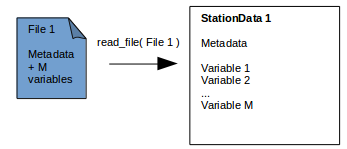

In [43]:
Image(filename="./images/read_file.png", width=700, height = 700 )

# The Pyaerocom Standard
## Inserting this stationdata object into an UngriddedData object
![title](./images/reading_file_example.png)


# Inserting Several Files Into An UngriddedData Object

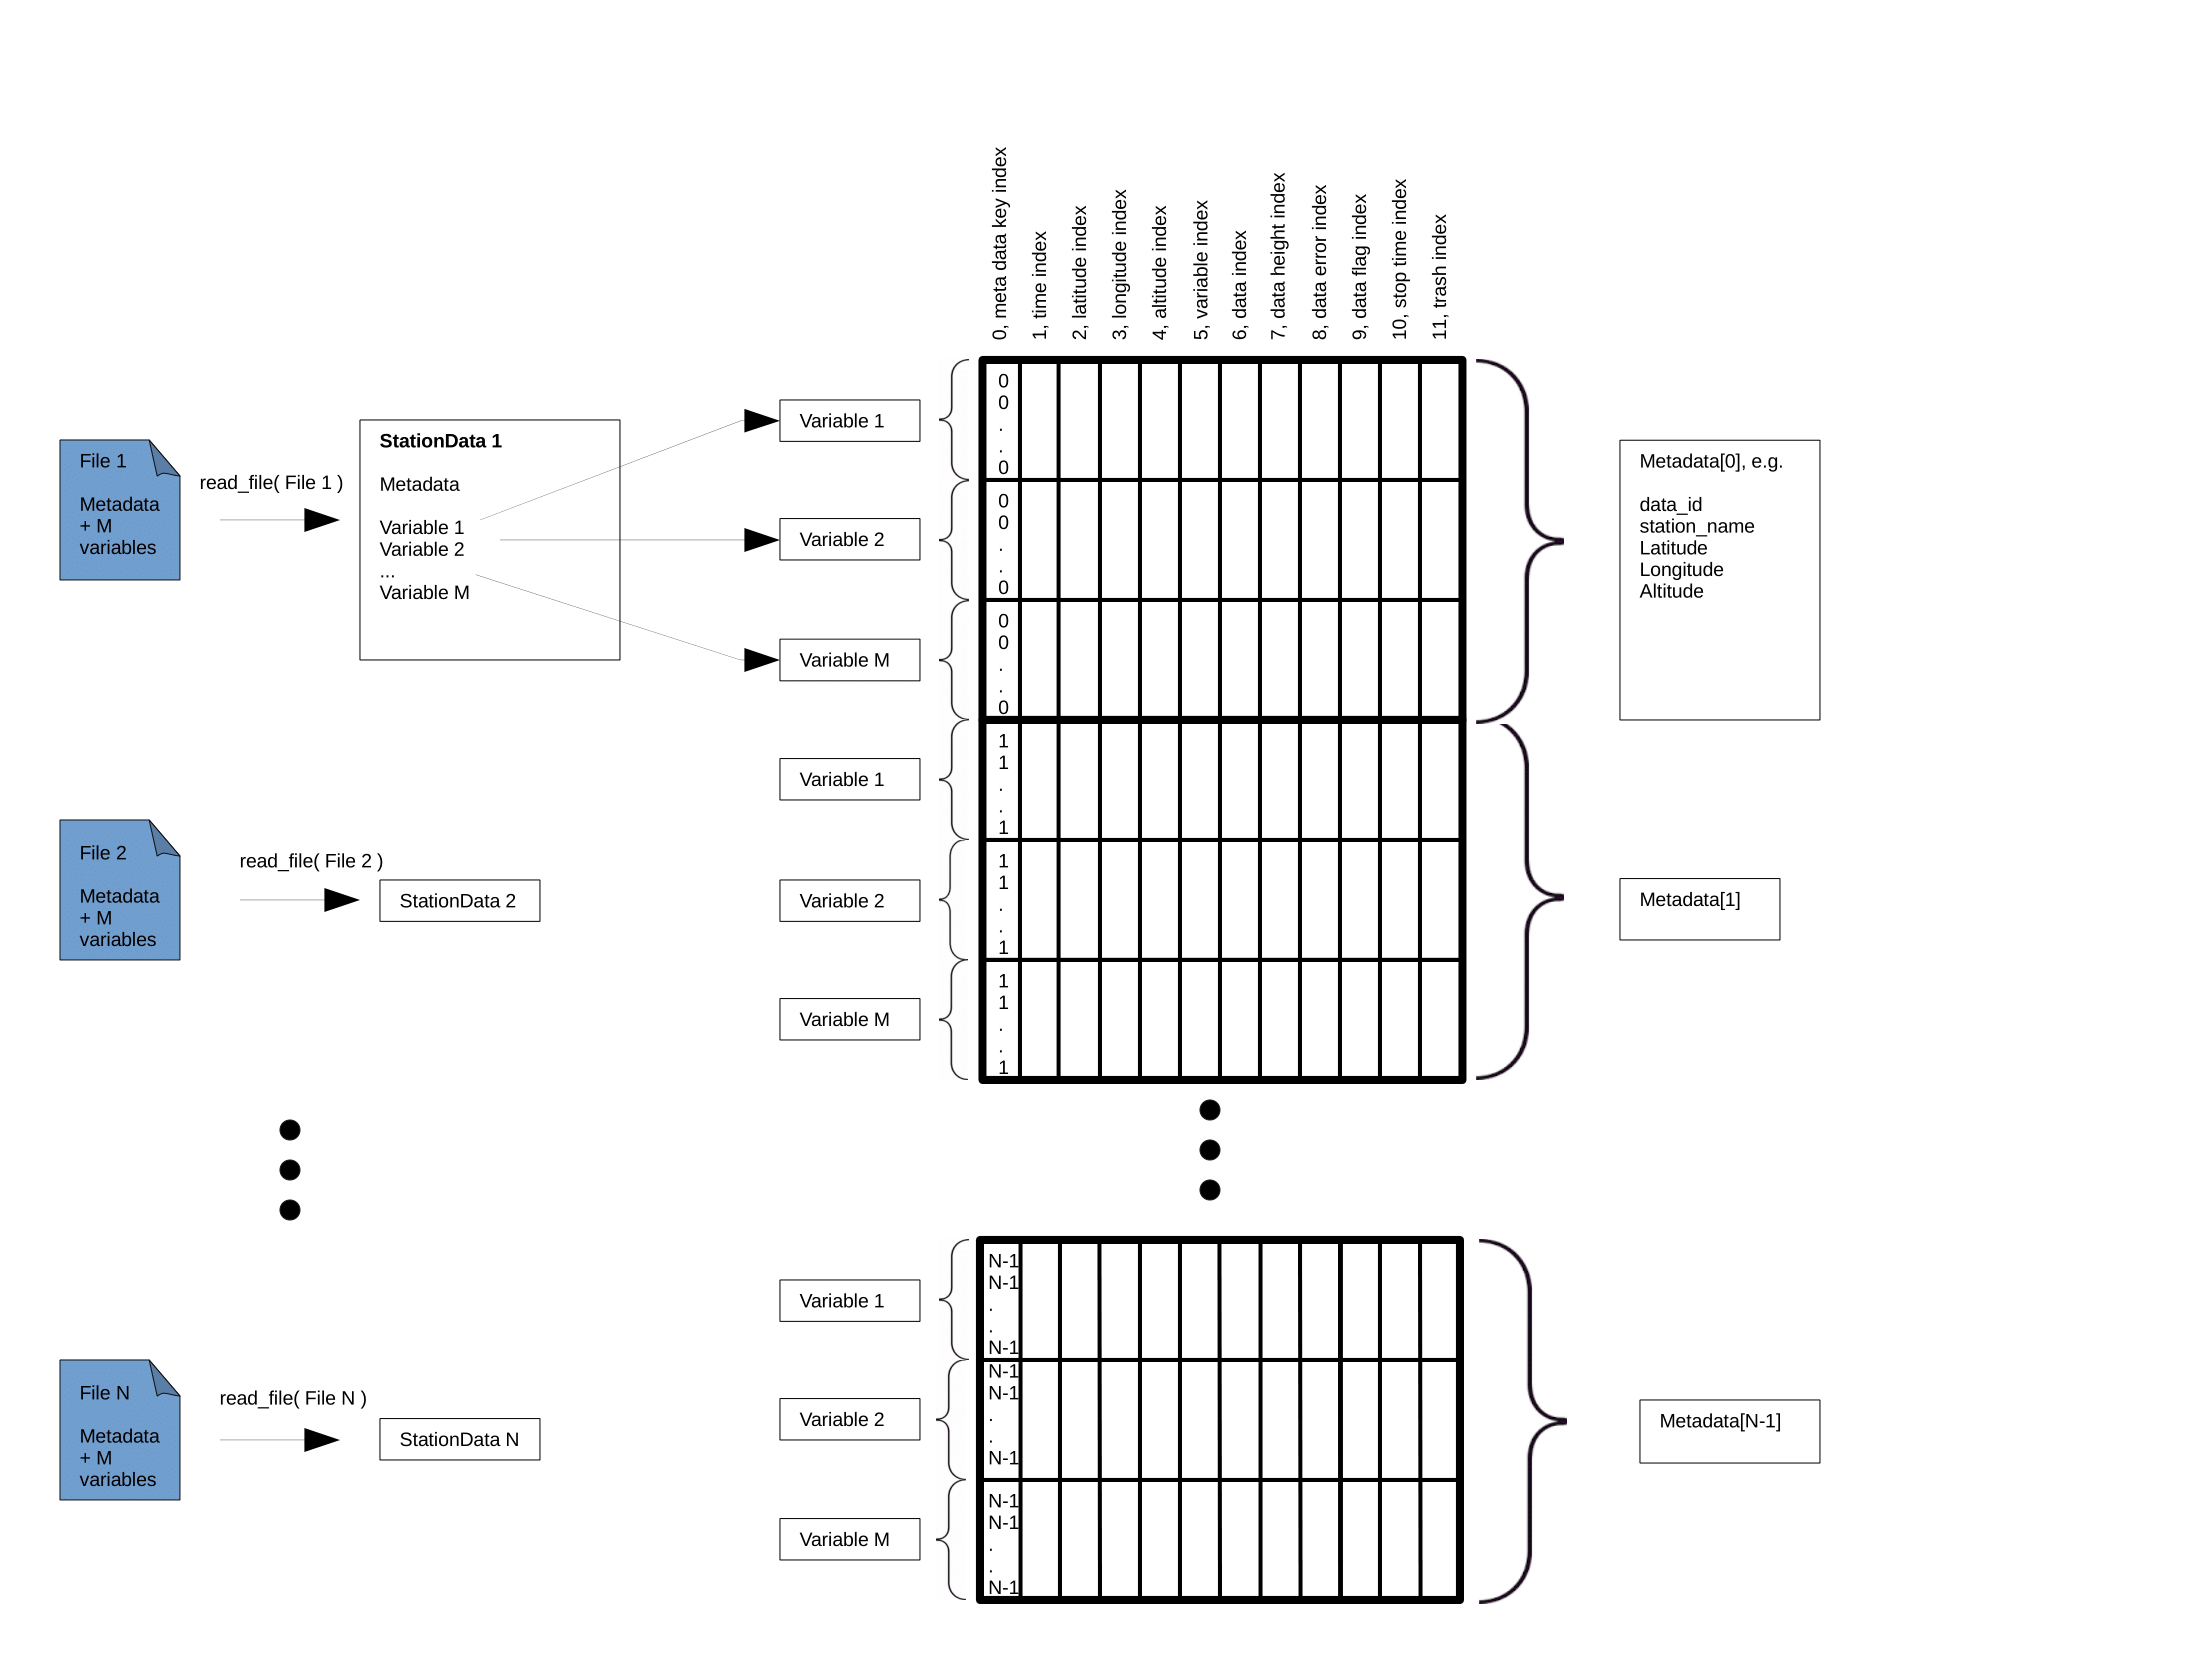

In [44]:
Image(filename="./images/ungriddeddataobject.png", width=1000, height = 1000 )

## Data from paper Aas et al 
* Three files. Each file contains all the stations measuring a certain variable.
* Two of the files contain one variable each and the third one contains three variables.

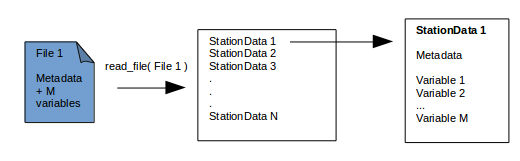

In [40]:
Image(filename="./images/aasetal.png", width=1000, height = 1000 )

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime
from stationdata import StationData

def pandas_header(filename, vars_to_retrieve=None): #  -> List[StationData]:
    """Read GawTadSubsetAasEtAl files

    Parameters
    ----------
    filename : str
    absolute path to filename to read

    Returns
    -------
    station_list : List[StationData]
    List of dictionary-like object containing data

    """

    station_list = []

    mapping = {}
    mapping['concentration_mgS/L'] = 'sconcSO4precip'
    mapping['precip_amount_mm'] = 'pr'
    mapping['deposition_kgS/ha'] = 'wetSO4'
    mapping['concentration_ugS/m3'] = ['sconcso2', 'sconcso4'] 
    
    df = pd.read_csv(filename,sep=",", low_memory=False)
    df["day"] = np.ones((len(df["year"]))).astype('int')
    df['dtime'] = df.apply(lambda row: datetime(row['year'], row['month'], row["day"]), axis=1) # array av numpy.datetime64
    df.rename(columns= {"Sampler":"instrument_name"}, inplace = True)
    df.pop("year")
    df.pop("month")
    df.pop("day")
    grouped = df.groupby(by = "station_name")
    print(df.head())
    # Looping over every station:
    """
    for name, group in grouped:

        s = StationData()
        s['station_name'] = name
        s["altitude"] = np.nan
        s["filename"] = filename

        # Needs a update
        s["PI"] = "who"
        s["PI_email"] = "what"
        #s["data_id"] = self.DATA_ID
        #s["ts_type"] = self.TS_TYPE

        temp_vars = []

        for key in group.keys():
            # if key is a variable
            if key in mapping.keys():
                # Todo this needs to be improved
                if isinstance(mapping[key], str):
                    var = mapping[key]
                    temp_vars.append(var)
                elif "so2" in filename:
                    var = mapping[key][0]
                    temp_vars.append(var)
                else:
                    var = self.mapping[key][1]
                    temp_vars.append(var)
                s[var] = pd.to_numeric(group[key], errors='coerce').values
                # the above line makes sure that both integers and nan values are considered numeric

            else:
                if key == 'dtime':
                    s[key] = group[key].values
                else:
                    s[key] = group[key].values[0]
        s['variables'] = temp_vars
        station_list.append(s)
    return station_list
    """
    return 

## Header of the pandas dataframe when reading SO2

In [45]:
path = '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/GAWTADSulphurSubset/data/'
pandas_header(filename = path+"monthly_so2.csv")

  station_name station_code        component Matrix  latitude  longitude  \
0   Amersfoort      ZA0002I  sulphur_dioxide    air    -27.02      29.87   
1   Amersfoort      ZA0002I  sulphur_dioxide    air    -27.02      29.87   
2   Amersfoort      ZA0002I  sulphur_dioxide    air    -27.02      29.87   
3   Amersfoort      ZA0002I  sulphur_dioxide    air    -27.02      29.87   
4   Amersfoort      ZA0002I  sulphur_dioxide    air    -27.02      29.87   

  Network  instrument_name sampling_frequency  concentration_ugS/m3      dtime  
0    IDAF  passive_sampler            monthly                  5.42 1997-09-01  
1    IDAF  passive_sampler            monthly                  3.64 1997-10-01  
2    IDAF  passive_sampler            monthly                  4.45 1997-11-01  
3    IDAF  passive_sampler            monthly                  5.52 1997-12-01  
4    IDAF  passive_sampler            monthly                  5.07 1998-01-01  


In [46]:
pandas_header(filename = path+"monthly_so4_aero.csv")

  station_name station_code component   Matrix  latitude  longitude Network  \
0      Payerne      CH0002R  sulphate  aerosol     46.81       6.94    EMEP   
1      Payerne      CH0002R  sulphate  aerosol     46.81       6.94    EMEP   
2      Payerne      CH0002R  sulphate  aerosol     46.81       6.94    EMEP   
3      Payerne      CH0002R  sulphate  aerosol     46.81       6.94    EMEP   
4      Payerne      CH0002R  sulphate  aerosol     46.81       6.94    EMEP   

      instrument_name sampling_frequency  concentration_ugS/m3      dtime  
0  3_stage_filterpack              daily                 3.061 1980-01-01  
1  3_stage_filterpack              daily                 2.510 1980-02-01  
2  3_stage_filterpack              daily                 3.397 1980-03-01  
3  3_stage_filterpack              daily                 3.380 1980-04-01  
4  3_stage_filterpack              daily                 3.581 1980-05-01  


In [37]:
pandas_header(filename = path+"monthly_so4_precip.csv")

  station_name station_code component         Matrix  latitude  longitude  \
0       Algoma     CAPM_ALG  sulphate  precipitation  47.03367  -84.37897   
1       Algoma     CAPM_ALG  sulphate  precipitation  47.03367  -84.37897   
2       Algoma     CAPM_ALG  sulphate  precipitation  47.03367  -84.37897   
3       Algoma     CAPM_ALG  sulphate  precipitation  47.03367  -84.37897   
4       Algoma     CAPM_ALG  sulphate  precipitation  47.03367  -84.37897   

  Network instrument_name sampling_frequency concentration_mgS/L  \
0  CAPMoN        wet only              daily               0.732   
1  CAPMoN        wet only              daily               0.983   
2  CAPMoN        wet only              daily               0.741   
3  CAPMoN        wet only              daily                0.35   
4  CAPMoN        wet only              daily               0.176   

   precip_amount_mm  deposition_kgS/ha      dtime  
0             120.8              0.885 1985-08-01  
1             178.0     

# All available stations in Aas et al
![title](./images/test_stations_aasetal.png)

<h1><center> Questions? </center></h1>